**EXERCISE:** Answer the following questions based on the Adult dataset
1. What is the mean age of all persons in the data?
2. What is the mean age of female persons? What about male persons?
3. How many different types of educations are there?
4. What are the different types of education and how many persons are the for each type?
5. Is there a difference in educational level across sex?
6. What is the most common relationship status?
7. Is there a correlation between hours per week (worked) and age?
8. Is the average hours per week (worked) different across different marital-status groups?
9. Is there an income difference across sexes?

In [193]:
import pandas
import matplotlib.pyplot as plt

In [194]:
#?pandas.read_csv

In [195]:
data_frame = pandas.read_csv("adult.csv")


In [196]:
print(data_frame.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [197]:
print(data_frame.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


### 1. What is the mean age of all persons in the data?

In [198]:
mean_age = data_frame["age"].mean()

print(mean_age)

38.64358543876172


### 2. What is the mean age of female persons? What about male persons?

In [199]:
female_mean_age = data_frame.loc[data_frame["sex"] == "Female", "age"].mean()

print(female_mean_age)


36.92798913043478


### 3. How many different types of educations are there?

There are 16, i did a check with min max, to check starting counting value.

In [200]:
min = data_frame["education-num"].min()
max = data_frame["education-num"].max()

print(min)
print(max)

1
16


### 4. What are the different types of education and how many persons are the for each type?

The different types:

In [201]:
education_types_overview = sorted(data_frame["education"].unique())

print(education_types_overview)

['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']


people pr type:

In [202]:
people_pr_type = data_frame["education"].value_counts()

print(people_pr_type)

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


#### 5. Is there a difference in educational level across sex?

In [203]:
import pandas as pd

# counts (sex x education)
counts = pd.crosstab(df["sex"], df["education"])

# % within each sex (row-wise)
pct = counts.div(counts.sum(axis=1), axis=0).mul(100).round(2)

# stack them into a single dataframe: each education has (count, pct)
overview_df = pd.concat(
    {"count": counts, "pct": pct},
    axis=1
).swaplevel(0, 1, axis=1).sort_index(axis=1, level=0)

overview_df


education  10th        11th        12th       1st-4th       5th-6th        \
          count   pct count   pct count   pct   count   pct   count   pct   
sex                                                                         
Female      457  2.82   650  4.01   211  1.30      61  0.38     127  0.78   
Male        932  2.85  1162  3.56   446  1.37     186  0.57     382  1.17   

education  ... HS-grad        Masters       Preschool       Prof-school        \
           ...   count    pct   count   pct     count   pct       count   pct   
sex        ...                                                                  
Female     ...    5097  31.48     845  5.22        24  0.15         132  0.82   
Male       ...   10687  32.73    1812  5.55        59  0.18         702  2.15   

education Some-college         
                 count    pct  
sex                            
Female            4178  25.80  
Male              6700  20.52  

[2 rows x 32 columns]

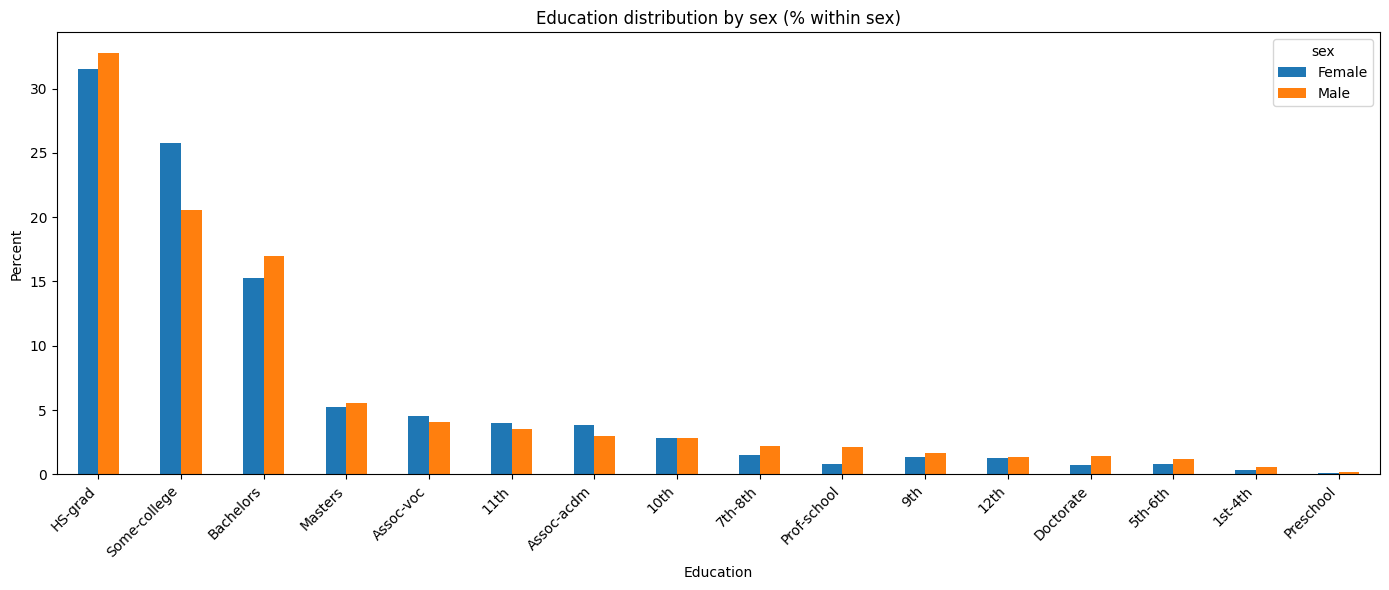

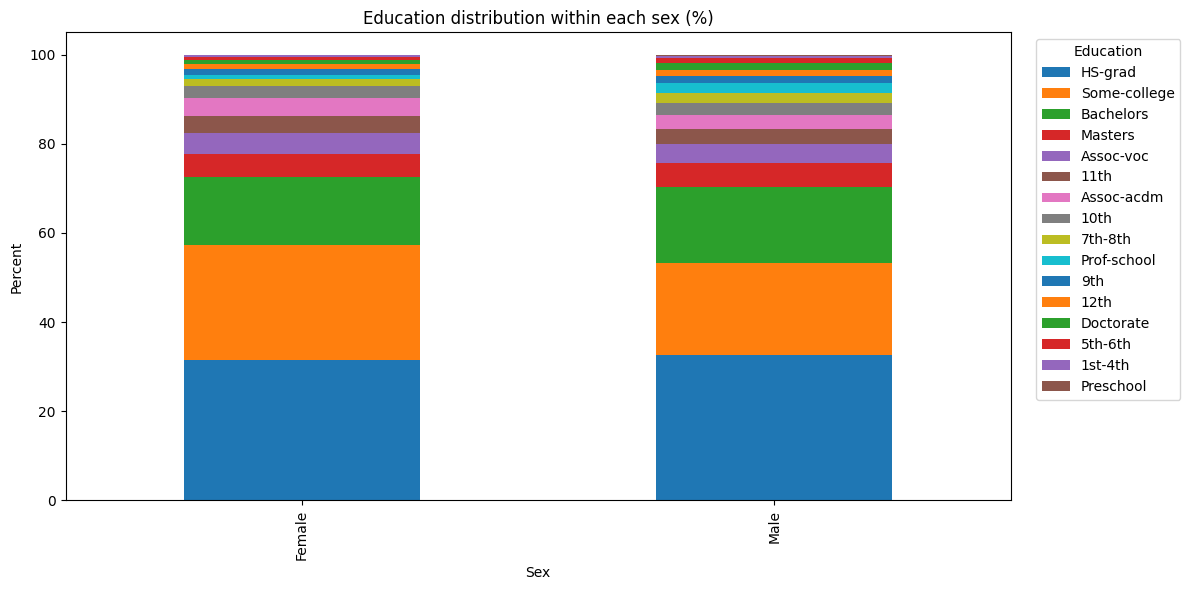

In [209]:
# If your overview_df has a 'sex' column (because you used reset_index), make it the index
df_plot = overview_df.set_index("sex") if "sex" in overview_df.columns else overview_df

# Extract the count/pct tables depending on how overview_df was built
if isinstance(df_plot.columns, pd.MultiIndex):
    counts = df_plot.xs("count", level=1, axis=1)  # education columns, values = counts
    pct    = df_plot.xs("pct",   level=1, axis=1)  # education columns, values = percent
else:
    # fallback if columns are like count__Bachelors / pct__Bachelors
    counts = df_plot.filter(like="count__").rename(columns=lambda c: c.replace("count__", ""))
    pct    = df_plot.filter(like="pct__").rename(columns=lambda c: c.replace("pct__", ""))

# Optional: order education by overall frequency (makes the plot easier to read)
order = counts.sum(axis=0).sort_values(ascending=False).index
counts = counts[order]
pct = pct[order]

# --- 1) Grouped bar chart (COUNTS) ---
ax = pct.T.plot(kind="bar", figsize=(14, 6))  # education on x-axis, Male/Female as bars
ax.set_title("Education distribution by sex (% within sex)")
ax.set_xlabel("Education")
ax.set_ylabel("Percent")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- 2) Stacked bar chart (PERCENT within sex) ---
ax = pct.plot(kind="bar", stacked=True, figsize=(12, 6))
ax.set_title("Education distribution within each sex (%)")
ax.set_xlabel("Sex")
ax.set_ylabel("Percent")
plt.legend(title="Education", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()